In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
import os
from mpl_toolkits.mplot3d import Axes3D

In [3]:
initial_data = yf.download("BNB-USD", start="2021-02-01", end="2022-02-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-01,44.309074,52.138683,43.524193,51.607697,51.607697,1256933735
2021-02-02,51.551884,52.911865,49.387074,51.056404,51.056404,1006694242
2021-02-03,51.050102,52.677433,49.955585,52.242638,52.242638,714000888
2021-02-04,52.242210,57.070911,51.602642,55.925125,55.925125,940905214
2021-02-05,56.010803,68.463959,56.010803,67.845566,67.845566,1431595319


In [5]:
initial_data['Adj Close'].head()

Date
2021-02-01    51.607697
2021-02-02    51.056404
2021-02-03    52.242638
2021-02-04    55.925125
2021-02-05    67.845566
Name: Adj Close, dtype: float64

In [6]:
data =  initial_data['Adj Close']

In [7]:
data.head()

Date
2021-02-01    51.607697
2021-02-02    51.056404
2021-02-03    52.242638
2021-02-04    55.925125
2021-02-05    67.845566
Name: Adj Close, dtype: float64

In [8]:
data.tail()

Date
2022-01-28    386.084381
2022-01-29    389.132782
2022-01-30    377.612915
2022-01-31    375.277313
2022-02-01    385.463806
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

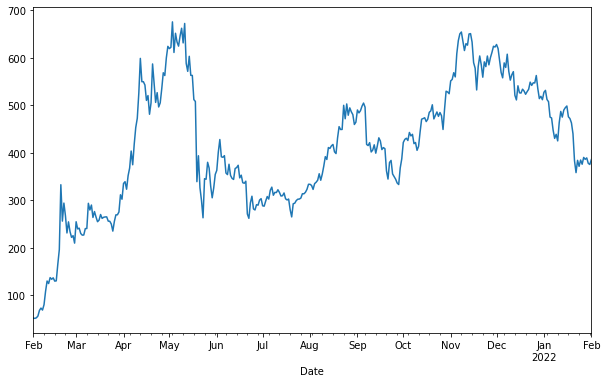

In [9]:
data.plot(figsize=(10, 6), subplots=True)

In [10]:
data.describe().round(2)

count    366.00
mean     412.23
std      135.21
min       51.06
25%      314.01
50%      409.92
75%      520.04
max      675.68
Name: Adj Close, dtype: float64

In [11]:
data.diff().head()

Date
2021-02-01          NaN
2021-02-02    -0.551292
2021-02-03     1.186234
2021-02-04     3.682487
2021-02-05    11.920441
Name: Adj Close, dtype: float64

In [12]:
data.diff().describe().round(2)

count    365.00
mean       0.91
std       26.04
min     -169.00
25%      -11.15
50%        1.11
75%       13.60
max      136.68
Name: Adj Close, dtype: float64

In [13]:
data.pct_change().round(4).head()

Date
2021-02-01       NaN
2021-02-02   -0.0107
2021-02-03    0.0232
2021-02-04    0.0705
2021-02-05    0.2132
Name: Adj Close, dtype: float64

In [14]:
data = pd.DataFrame(data)

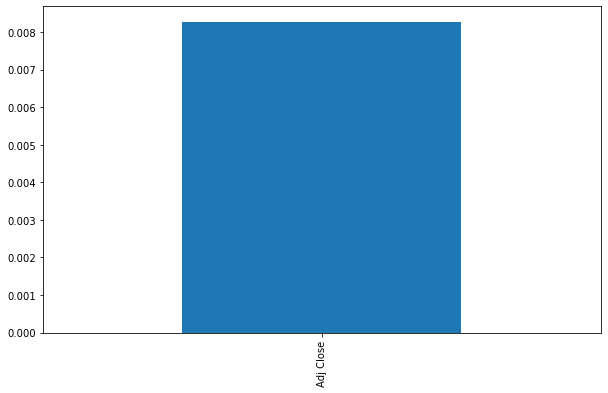

In [15]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [16]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,Adj Close
Date,
2021-02-01,NaN
2021-02-02,-0.0107
2021-02-03,0.0230
2021-02-04,0.0681
2021-02-05,0.1932


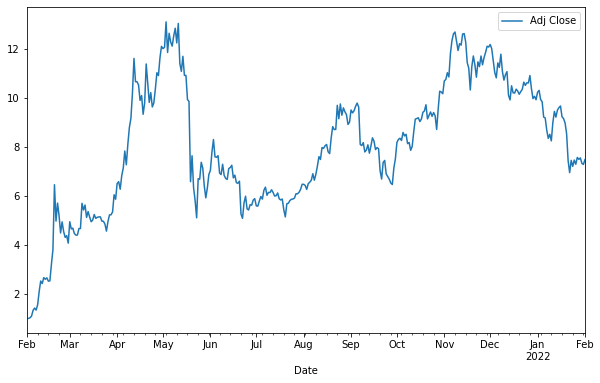

In [17]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [18]:
data.resample('1w', label='right').last().head()

,Adj Close
Date,
2021-02-07,68.590523
2021-02-14,136.426514
2021-02-21,293.923584
2021-02-28,209.574402
2021-03-07,240.179214


In [19]:
data.resample('1m', label='right').last().head()

,Adj Close
Date,
2021-02-28,209.574402
2021-03-31,302.063446
2021-04-30,624.080566
2021-05-31,354.329346
2021-06-30,303.295868


<AxesSubplot:xlabel='Date'>

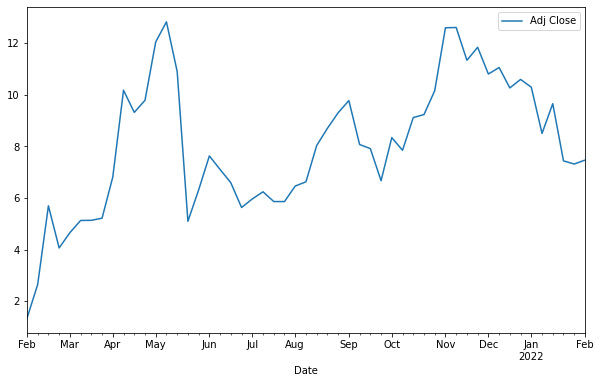

In [20]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

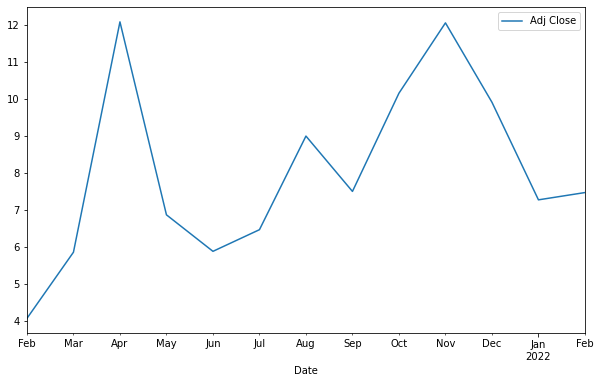

In [21]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

In [23]:
normal_return = data.pct_change()

In [24]:
dfnr = pd.DataFrame(normal_return, columns = ['Adj Close']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 3.02686448 and its annulized volatility is 1.47826418


In [25]:
log_return = data.pct_change()

In [26]:
dflr = pd.DataFrame(log_return, columns = ['Adj Close']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 3.02686448 and its annulized volatility is 1.47826418


In [188]:
S0 = 385.46	              # spot stock price
K = 375              # strike
T = 0.083                 # maturity 
r = 0.0167                 # risk free rate 
sig = 1.47               # diffusion coefficient or volatility
N = 4                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [189]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [190]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [191]:
S

array([[385.46      , 476.36714624, 588.71389513, 727.556577  ,
        899.14401057],
       [  0.        , 311.90104686, 385.46      , 476.36714624,
        588.71389513],
       [  0.        ,   0.        , 252.37965815, 311.90104686,
        385.46      ],
       [  0.        ,   0.        ,   0.        , 204.21698641,
        252.37965815],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        165.24539991]])

In [192]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4480713538677276

In [193]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        122.62034185],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        209.75460009]])

In [194]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 56.33670195,  20.59490756,   0.        ,   0.        ,
          0.        ],
       [  0.        ,  85.38828275,  37.32737119,   0.        ,
          0.        ],
       [  0.        ,   0.        , 124.45911585,  67.65423132,
          0.        ],
       [  0.        ,   0.        ,   0.        , 170.65308923,
        122.62034185],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        209.75460009]])

In [195]:
print('European ' + payoff, str( V[0,0]))

European put 56.3367019484385


In [196]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [197]:
T = .083
r = 0.0167
sigma = 1.47
S0 = 385.46
K = 375

In [198]:
S = mcs_simulation_np(1000)

In [199]:
S = np.transpose(S)
S

array([[385.46      , 386.8669782 , 391.2075907 , ..., 357.07914486,
        358.3282905 , 356.42151721],
       [385.46      , 392.92100186, 389.40319777, ..., 374.06630783,
        378.30497252, 385.31441512],
       [385.46      , 397.46547817, 395.48556862, ..., 161.93327538,
        166.62365442, 169.38996295],
       ...,
       [385.46      , 383.82224719, 381.51062107, ..., 446.08106787,
        450.99382237, 469.34896495],
       [385.46      , 386.5240802 , 389.42525743, ..., 318.90091462,
        314.76397296, 309.0993153 ],
       [385.46      , 387.5795312 , 393.68980577, ..., 294.53467897,
        292.13395285, 293.83779921]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

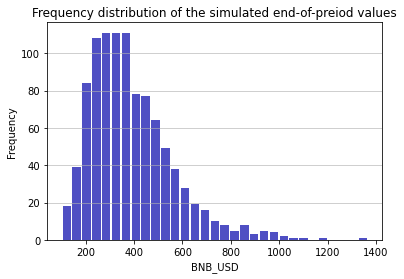

In [200]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('BNB_USD')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [201]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 58.04828064402729


In [202]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [203]:
euro_option_bsm(385.46, 375, 1/12, 0.0167, 0, 1.477, 'put')

58.80020376276866

In [204]:
S = np.linspace(300,400,350)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Put [i] = euro_option_bsm(S[i], 375, 1/12, 0.0167, 0, 1.477, 'put')

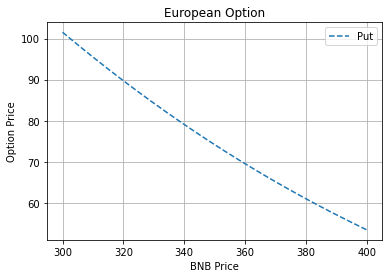

In [205]:
fig = plt.figure()
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('BNB Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Put'])

In [206]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [207]:
delta(385.46, 375, 1/12, 0.0167, 0, 1.477, 'put')

-0.3893648718518279

In [208]:
S = np.linspace(300,400,350)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 375, 1/12, 0.0167, 0, 1.477, 'put')

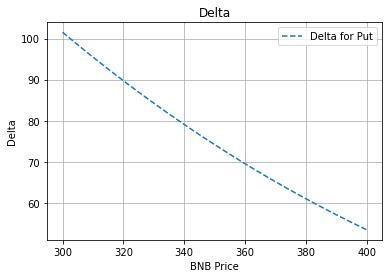

In [209]:
fig = plt.figure()
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('BNB Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

In [210]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [146]:
gamma(385.46, 375, 1/12, 0.0167, 0, 1.477, 'put')

0.0023334461924268742

In [212]:
S = np.linspace(300,400,350)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 375, 1/12, 0.0167, 0, 1.477, 'put')

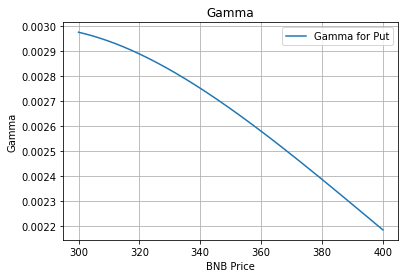

In [213]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('BNB Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

In [214]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [215]:
speed(385.46, 375, 1/12, 0.0167, 0, 1.477, 'put')

-2.899152629208953e-06

In [216]:
S = np.linspace(300,400,350)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 375, 1/12, 0.0167, 0, 1.477, 'Put')

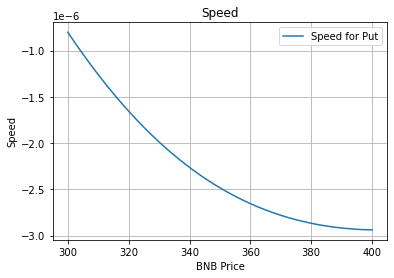

In [218]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('BNB Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

In [219]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [220]:
theta(385.46, 375, 1/12, 0.0167, 0, 1.477, 'put')

381.6586775494008

In [221]:
T = np.linspace(300,400,350)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
       Theta_Put [i] = theta(385.46, 375, T[i], 0.0167, 0, 1.477, 'put')

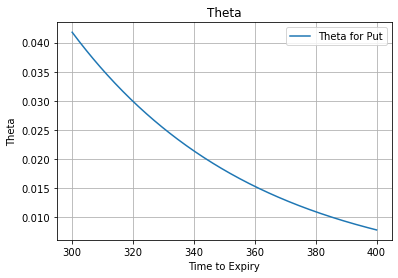

In [154]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

In [101]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [155]:
rho(385.46, 375, 1/12, 0.0167, 0, 1.477, 'put')

-17.407065605564522

In [103]:
r = np.linspace(300,400,350)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
       Rho_Put [i] = rho(385.46, 375, 1/12, r[i], 0, 1.477, 'put')

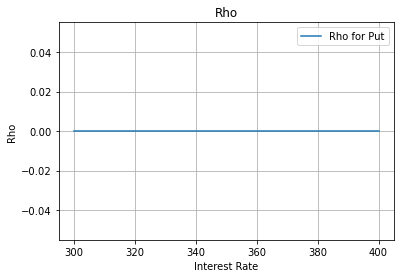

In [104]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

In [95]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [156]:
vega(385.46, 375, 1/12, 0.0167, 0, 1.477, 'put')

42.67324549786116

In [157]:
vol = np.linspace(300,400,350)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(385.46, 375, 1/12, 0.0167, 0, vol[i], 'put')

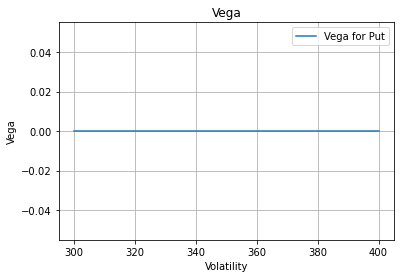

In [158]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])

In [223]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [224]:
S = np.linspace(300, 400, 350)
T = np.linspace(0.5, 2, 50)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 375, T[i], 0.0167, 0, 1.47, 'put')

C:\Users\w1872796\AppData\Local\Temp/ipykernel_2680/3352196669.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


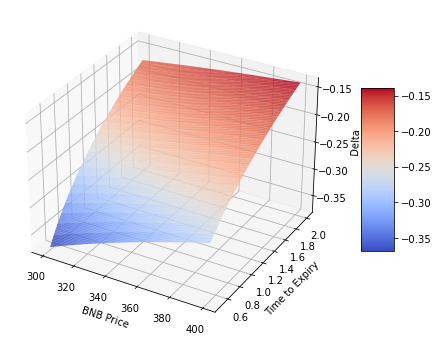

In [225]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('BNB Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [226]:
d = delta(385.46, 375, 0.083, 0.0167, 0, 1.47, 'put')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is -0.3897 . If the stock price increase 1 dollar, then the value of the option will increase $ -0.3897 .


In [231]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [232]:
S = np.linspace(300, 400, 350)
T = np.linspace(0.5, 2, 50)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 375, T[i], 0.0167, 0, 1.47, 'put')

C:\Users\w1872796\AppData\Local\Temp/ipykernel_2680/2810594895.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


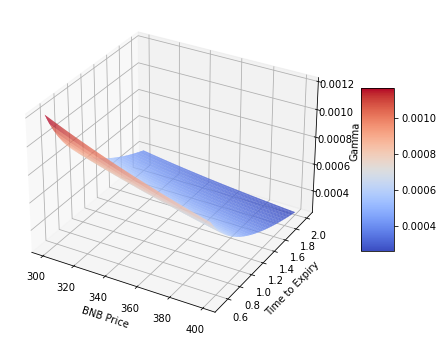

In [233]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('BNB Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [234]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [235]:
S = np.linspace(300, 400, 350)
T = np.linspace(0.5, 2, 50)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 375, T[i], 0.0167, 0, 1.47, 'put')

C:\Users\w1872796\AppData\Local\Temp/ipykernel_2680/3473036169.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


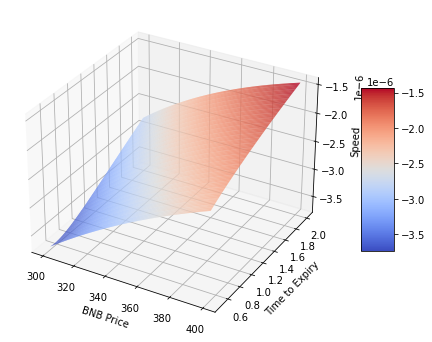

In [236]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('BNB Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [237]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [238]:
S = np.linspace(300, 400, 350)
T = np.linspace(0.5, 2, 50)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 375, T[i], 0.0167, 0, 1.47, 'put')

C:\Users\w1872796\AppData\Local\Temp/ipykernel_2680/2087940635.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


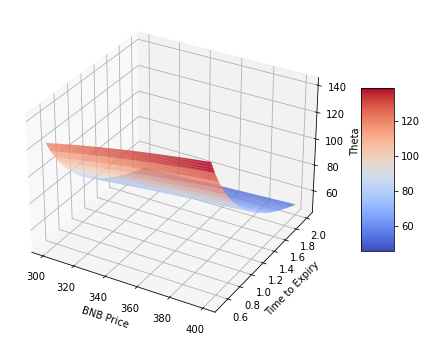

In [239]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('BNB Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [240]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [241]:
S = np.linspace(300, 400, 350)
r = np.linspace(1, 2, 50)
Rho = np.zeros((len(r),len(S)))
for j in range(len(S)):
    for i in range(len(r)):
        Rho[i,j] = rho(S[j], 375, 0.083, r[i], 0, 1.72, 'put')

C:\Users\w1872796\AppData\Local\Temp/ipykernel_2680/3111871027.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


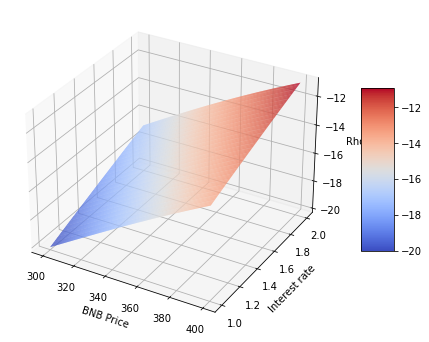

In [242]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, r = np.meshgrid(S, r)
surf = ax.plot_surface(S, r, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('BNB Price')
ax.set_ylabel('Interest rate')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);